Jmf textsträngar med yrken som används i SKBL och SBL

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-08-15 18:03:07.275193


In [34]:
import pandas as pd
dfSKBL = pd.read_csv("SKBLyrken_valuecount.csv",names=["Yrke","Antal"])
dfSKBL = dfSKBL.iloc[1: , :] # drop row1
dfSBL = pd.read_csv("SBLyrken.csv",names=["Yrke"])
dfSBL = dfSBL.iloc[1: , :] # drop row1
#dfSBL
#dfAlvin

In [35]:
dfSKBL.head(5)

,Yrke,Antal
1,Författare,208
2,Lärare,147
3,Konstnär,114
4,Skådespelare,80
5,Socialt och filantropiskt arbete,66


In [36]:
dfSBL.head(5)

,Yrke
1,Abbedissa
2,Advokat
3,Affärsjurist
4,Affärsman
5,Agitator


In [44]:
mergeSKBL_SBL = pd.merge(dfSBL, dfSKBL,how='outer', on='Yrke',indicator=True) 

,Yrke,Antal,_merge
0,Abbedissa,4,both
1,Advokat,NaN,left_only
2,Affärsjurist,NaN,left_only
3,Affärsman,NaN,left_only
4,Agitator,2,both
...,...,...,...
1061,Studieorganisatör,1,right_only
1062,Lotta,1,right_only
1063,Soldat,1,right_only
1064,Drottning av Sverige och Norge,1,right_only


In [45]:
mergeSKBL_SBL.rename(columns={"_merge": "SBL_SKBL"},inplace = True)
mergeSKBL_SBL['SBL_SKBL'] = mergeSKBL_SBL['SBL_SKBL'].str.replace('left_only','SBL_only').str.replace('right_only','SKBL_only')
mergeSKBL_SBL

,Yrke,Antal,SBL_SKBL
0,Abbedissa,4,both
1,Advokat,NaN,SBL_only
2,Affärsjurist,NaN,SBL_only
3,Affärsman,NaN,SBL_only
4,Agitator,2,both
...,...,...,...
1061,Studieorganisatör,1,SKBL_only
1062,Lotta,1,SKBL_only
1063,Soldat,1,SKBL_only
1064,Drottning av Sverige och Norge,1,SKBL_only


In [46]:
mergeSKBL_SBL.to_csv("SKBL_SBL_yrken.csv")

In [48]:
SKBLSBLpie = mergeSKBL_SBL["SBL_SKBL"].value_counts()
SKBLSBLpie

SBL_only     837
SKBL_only    149
both          80
Name: SBL_SKBL, dtype: int64

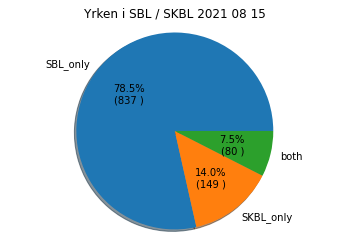

In [69]:
import numpy as np
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} )".format(pct, absolute) 

SKBLSBLpie.plot( kind = 'pie', autopct=lambda pct: func(pct, SKBLSBLpie), shadow=True)

plt.ylabel('')
plt.axis('equal')
plt.title("Yrken i SBL / SKBL " + start_time.strftime('%Y %m %d'))
plt.savefig('SKBLSBLfemale.png')

plt.show()